# 4. 단순 회귀분석

## 4.1. 행렬을 이용한 회귀모형 구하기

➡️ 주어진 데이터에서 행렬식을 이용하여 연릭방정식의 해를 구하는 예시

➡️ y = w * x  + b에서 x와 y를 가지고 w와 b를 구해야 한다.

In [ ]:
X = [32, 64, 96, 118, 126, 144, 152, 158]
Y = [17, 24, 62, 49, 52, 105, 130, 125]

In [ ]:
import numpy as np
A = np.c_[X, np.ones(8)]
B = np.array(Y)

In [ ]:
A

array([[ 32.,   1.],
       [ 64.,   1.],
       [ 96.,   1.],
       [118.,   1.],
       [126.,   1.],
       [144.,   1.],
       [152.,   1.],
       [158.,   1.]])

In [ ]:
B

array([ 17,  24,  62,  49,  52, 105, 130, 125])

In [ ]:
model = np.linalg.inv(A.T @ A) @ A.T @ B
model

array([  0.87962664, -27.35846347])

## 4.2. 회귀모형 예측

### 4.2.1. linregress( )

➡️ linregress( ) 함수를 이용하여 회귀모형을 만들고 모형의 정보를 출력한다.

In [ ]:
X = [32, 64, 96, 118, 126, 144, 152, 158]
Y = [17, 24, 62, 49, 52, 105, 130, 125]

In [ ]:
from scipy import stats
result = stats.linregress(X, Y)
print(f"slope : {result.slope}")
print(f"intercept : {result.intercept}")
print(f"rvalue : {result.rvalue}")
print(f"pvalue : {result.pvalue}")
print(f"stderr : {result.stderr}")
print(f"intercept_stderr : {result.intercept_stderr}")

slope : 0.8796266379465087
intercept : -27.3584634715491
rvalue : 0.89008928103186
pvalue : 0.003051790677096642
stderr : 0.18388671751663876
intercept_stderr : 21.848883987057672


➡️ 구해진 회귀식을 이용하여 그래프를 그린다.

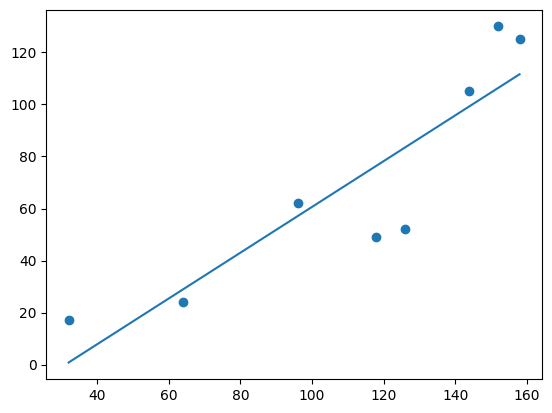

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.plot(X, result.slope*np.array(X) + result.intercept, '-')
plt.show()

### 4.2.2. polyfit( )

In [ ]:
X = [32, 64, 96, 118, 126, 144, 152, 158]
Y = [17, 24, 62, 49, 52, 105, 130, 125]

In [ ]:
import numpy as np
fit = np.polyfit(X, Y, 1)
fit

array([  0.87962664, -27.35846347])

➡️ poly1d( ) 함수는 계수를 이용해서 다항식 함수를 만든다.

In [ ]:
fit_fn = np.poly1d(fit)
fit_fn

poly1d([  0.87962664, -27.35846347])

➡️ 다항식 함수를 이용해서 그래프를 그린다.

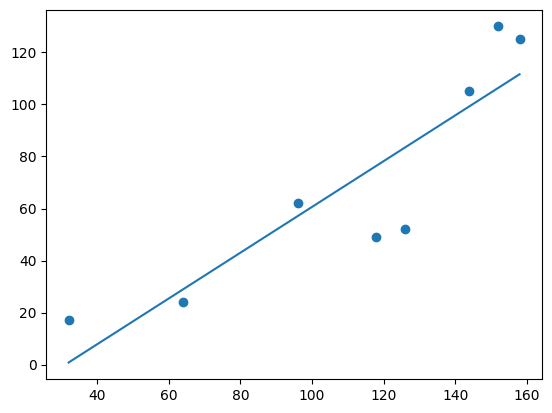

In [ ]:
plt.scatter(X, Y)
plt.plot(X, fit_fn(X))
plt.show()

➡️ 2차 방정식을 만들고 그래프로 표현한다. 선이 매끄럽게 그려지도록 30부터 60까지 100개 데이터를 만들어 X값 대신 사용한다.

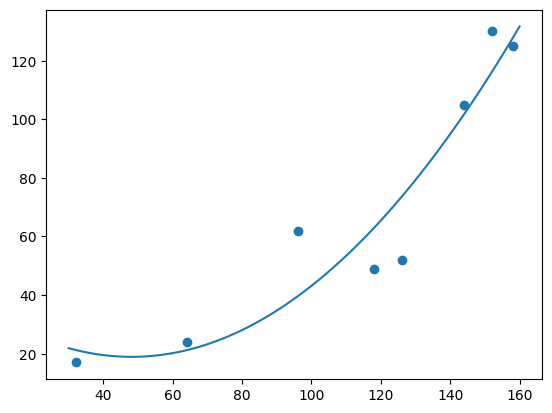

In [ ]:
fit = np.polyfit(X, Y, 2)
fit_fn = np.poly1d(fit)
sample_X = np.linspace(30, 160, 100)
plt.scatter(X, Y)
plt.plot(sample_X, fit_fn(sample_X))
plt.show()

➡️ X, Y 데이터와 차수(deg)가 주어지면 해당 차수의 회귀식을 계산하고 회귀 곡선을 그리는 함수를 만들 수 있다.

In [ ]:
def draw_polyfit(X, Y, deg=1) :
    import numpy as np
    fit = np.polyfit(X, Y, deg)
    print(fit)
    fit_fn = np.poly1d(fit)
    sample_X = np.linspace(min(X), max(X), 100)
    plt.scatter(X, Y)
    plt.plot(sample_X, fit_fn(sample_X))
    plt.show()

[ 1.36900759e-04 -3.06581641e-02  2.52476185e+00 -3.87896220e+01]


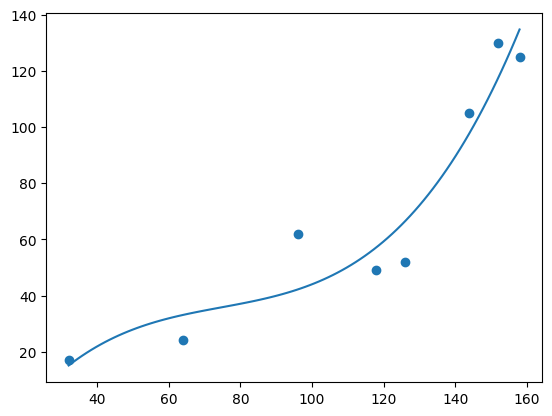

In [ ]:
draw_polyfit(X, Y, 3)

[ 1.99322810e-06 -6.27067834e-04  7.07083835e-02 -2.84352700e+00
  5.30450887e+01]


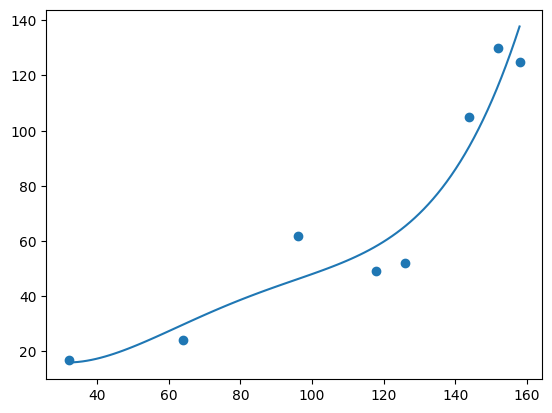

In [ ]:
draw_polyfit(X, Y, 4)

[-3.60679943e-07  1.80553138e-04 -3.41559339e-02  3.01519333e+00
 -1.21436798e+02  1.75743817e+03]


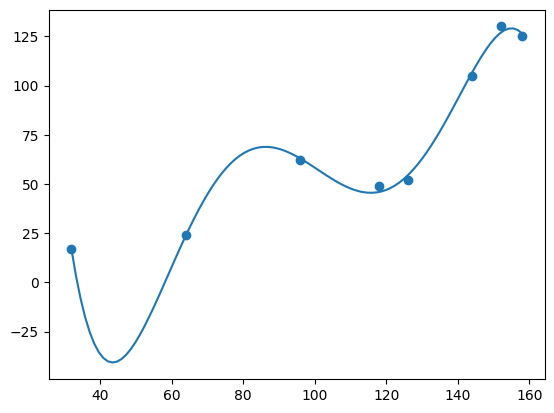

In [ ]:
draw_polyfit(X, Y, 5)

[-6.18327318e-09  3.46694642e-06 -7.70219609e-04  8.62372828e-02
 -5.09766458e+00  1.50398974e+02 -1.70364025e+03]


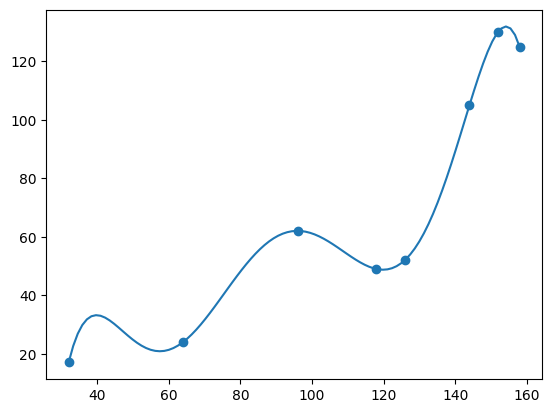

In [ ]:
draw_polyfit(X, Y, 6)